### Running Simulation Model
##### Jack Tobin
##### 30 September 2021

##### Updated 27th June 2022 with C++ backend

First we'll import some packages and the simulation class we constructed earlier.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy.stats import norm
import seaborn as sns

# local simulation file
from simulation import Simulation

Next we'll set some high-level simulation paramters such as initial wealth, return and stdevs etc.

In [2]:
# set model parameters
initial_wealth = 1000 # £1000
ann_return = 0.09
ann_stdev = 0.18
num_trials = 10000
num_years = 40

Next we'll build the Simulation object and run it.

In [3]:
# instantiate Simulation class
sim = Simulation(initial_wealth, ann_return, ann_stdev, num_trials, num_years)

# run the model
sim.simulate_values()

# get returns and values generated by the model as nice dataframes
values = pd.DataFrame(sim.values)
ann_returns = pd.DataFrame(sim.returns)
daily_returns = pd.DataFrame(sim.daily_returns)

# display
values.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1000.0,925.652347,911.120074,847.737784,823.293784,661.861619,913.140606,977.637204,1291.692160,1704.388673,...,1138.845316,1277.464978,1004.460179,1255.553405,697.964692,681.060605,563.852503,485.728451,484.701078,495.260051
1,1000.0,824.449183,938.001515,903.023211,1192.317396,1528.297099,1513.254099,1799.695360,1418.458364,1532.655515,...,5229.139249,5980.618764,6573.778249,9276.229830,8604.054877,9481.183081,10834.341455,10082.122526,13463.484464,9619.913601
2,1000.0,890.271571,836.726171,1413.322241,1455.825541,1295.134663,1344.854741,1644.618441,2069.592063,2739.476087,...,19094.638153,23075.933436,17601.028372,23831.729166,29797.733910,30431.531098,38495.690974,53154.412202,57798.001915,69503.064917
3,1000.0,1059.372353,890.855513,907.274003,1139.752944,1273.590418,1338.901165,1330.988079,1293.242539,1648.574952,...,11272.211418,10734.140848,13000.030609,14404.840806,12764.860255,15986.922063,17784.992395,21934.578875,32581.256701,44610.338610
4,1000.0,1330.665155,1386.371885,1853.530212,2001.813154,1758.368209,2261.200687,2613.196857,2699.641772,2535.389899,...,5270.220383,7201.326589,6980.063008,3246.644170,4068.504895,4465.715739,5107.660516,3942.853590,4115.391521,3817.223179


Lets plot a sample of 100 paths.

Text(0.5, 0.98, '100 Simulated Portfolios')

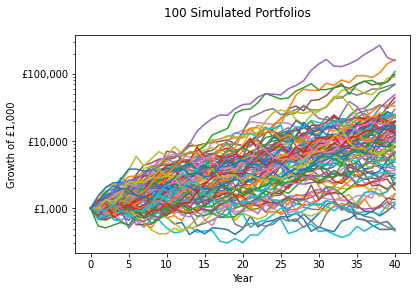

In [4]:
# subset
n_paths = 100
sample = values.loc[:n_paths, :].copy()

# create plot
fig, ax = plt.subplots(1)
for i in range(len(sample)):
    ax.plot(sample.loc[i, :])
ax.set_yscale('log') # to control for visual scale
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('£{x:,.0f}')) # £ format
ax.set_xlabel('Year')
ax.set_ylabel('Growth of £1,000')
fig.suptitle(str(n_paths) + ' Simulated Portfolios')

Next we'll show the 25th, 50th and 75th percentile across all simulated portfolios over time.

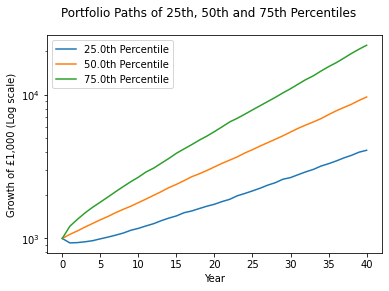

In [5]:
# convert values to the three percentiles
qs = [0.25, 0.50, 0.75]
percentiles = values.quantile(q=qs, axis=0)

# make plot
fig, ax = plt.subplots(1)
for q in qs:
    ax.plot(percentiles.loc[q, :], label='%sth Percentile' % str(round(q * 100,0)))
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('£{x:,.0f}')) # £ format
ax.set_xlabel('Year')
ax.set_ylabel('Growth of £1,000 (Log scale)')
ax.set_yscale('log')
fig.suptitle('Portfolio Paths of 25th, 50th and 75th Percentiles')
ax.legend(loc='upper left')

Next let's plot a histogram of the portfolio returns to visualize any skew we generated with the markov chain process.

[-0.00396751 -0.02223797  0.01129976 ...  0.00910198 -0.00506416
  0.00608346]


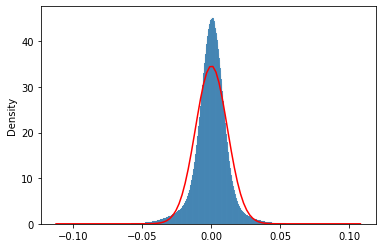

In [6]:
# daily returns
rets = daily_returns.to_numpy().ravel()

# visualize to check we have a 1D array
print(rets)

# create initial histogram plot
fig, ax = plt.subplots(1)
sns.histplot(rets, kde=False, stat='density', ax=ax)

# overlay normal distribution
x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
mu, std = norm.fit(rets)
x_pdf = np.linspace(x0, x1, 100)
y_pdf = norm.pdf(x_pdf, mu, std)
ax.plot(x_pdf, y_pdf, color='red')

Based on the histogram with overlaid normal distribution we can see that the simulated data is fat tailed i.e. relatively higher frequency of both near-zero and extreme values with relatively lower occurrence of in-between values compared with that of a normal distribution.

This shows that we've successfully simulated returns that exhibit the 'fat tails' of actual return distributions. Our simulated returns have both a higher chance of small returns and extremely negative returns compared with what a normal distribution would predict.